In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from pylab import rcParams
from sklearn import datasets
from sklearn.preprocessing import scale
from sklearn.cluster import KMeans
from sklearn.metrics import classification_report

%matplotlib inline
rcParams['figure.figsize'] = 7, 4
plt.style.use('seaborn-whitegrid')

In [2]:
iris = datasets.load_iris()

X = scale(iris.data)
y = pd.DataFrame(iris.target)
y.columns = ['Targets']
variable_names = iris.feature_names
iris_df = pd.DataFrame(iris.data)
iris_df.columns = variable_names

In [3]:
clustering = KMeans(n_clusters=3, random_state=5).fit(X)
clustering

KMeans(n_clusters=3, random_state=5)

Text(0.5, 1.0, 'Resultado KMeans')

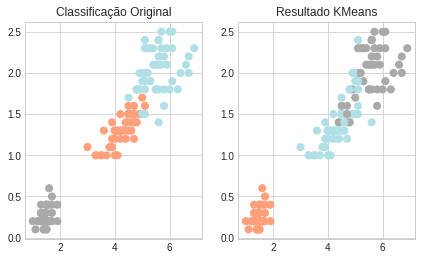

In [4]:
cores = np.array(['darkgrey', 'lightsalmon', 'powderblue'])

plt.subplot(1, 2, 1)
plt.scatter(x = iris_df['petal length (cm)'],
            y=iris_df['petal width (cm)'],
            c=cores[iris.target],
            s=50)
plt.title('Classificação Original')

plt.subplot(1, 2, 2)
plt.scatter(x = iris_df['petal length (cm)'],
            y=iris_df['petal width (cm)'],
            c=cores[clustering.labels_],
            s=50)
plt.title('Resultado KMeans')

Text(0.5, 1.0, 'Resultado KMeans')

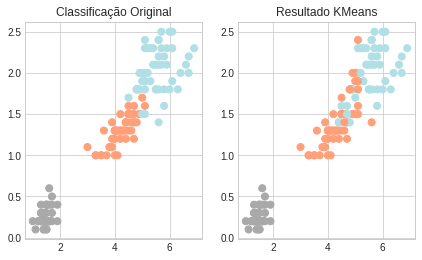

In [5]:
relabel = np.choose(clustering.labels_, [2, 0, 1]).astype(np.int64)

plt.subplot(1, 2, 1)
plt.scatter(x = iris_df['petal length (cm)'],
            y=iris_df['petal width (cm)'],
            c=cores[iris.target],
            s=50)
plt.title('Classificação Original')

plt.subplot(1, 2, 2)
plt.scatter(x = iris_df['petal length (cm)'],
            y=iris_df['petal width (cm)'],
            c=cores[relabel],
            s=50)
plt.title('Resultado KMeans')

In [6]:
metricas = classification_report(y, relabel)
print(metricas)

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        50
           1       0.74      0.78      0.76        50
           2       0.77      0.72      0.74        50

    accuracy                           0.83       150
   macro avg       0.83      0.83      0.83       150
weighted avg       0.83      0.83      0.83       150

